# Hack Diversity Challenge

In [9]:
pip install -q --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install -q plotly

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install -q nbformat


Note: you may need to restart the kernel to use updated packages.


# Reading Data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [82]:
# Read the Excel file
df = pd.read_excel('inclusive_features_usage.xlsx')
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   feature_used            10000 non-null  object 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  object 
 6   gender                  6003 non-null   object 
 7   additional_attributes   3997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [84]:
df.describe()

,session_duration,engagement_score,accessibility_settings
count,10000.000000,10000.00000,10000.000000
mean,62.443799,3.04360,2.489600
std,33.522672,1.41778,1.707332
min,5.010000,1.00000,0.000000
25%,33.070000,2.00000,1.000000
50%,63.175000,3.00000,2.000000
75%,91.600000,4.00000,4.000000
max,120.000000,5.00000,5.000000


In [85]:
missing_values = df.isnull().sum()
print(missing_values)

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64


## Data Cleaning

### Dealing with Missing values for gender (Unimportant for the analysis, important to retain the user information in the analysis)

In [86]:
df["gender"].fillna("Unknown", inplace=True)
df["gender"].value_counts()

/var/folders/zp/sq6bzsp91fz1sl3107mgk5gc0000gn/T/ipykernel_29491/3949538134.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





gender
Unknown       3997
Male          2029
Female        1990
Non-Binary    1984
Name: count, dtype: int64

### Dealing with Missing values for Additional Attributes

In [87]:
df["additional_attributes"].value_counts()

additional_attributes
Person of Color    2018
LGBTQ+             1979
Name: count, dtype: int64

In [88]:
df["additional_attributes"].fillna("No Attributes", inplace=True)

/var/folders/zp/sq6bzsp91fz1sl3107mgk5gc0000gn/T/ipykernel_29491/626627233.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [89]:
missing_values = df.isnull().sum()
print(missing_values)

user_id                   0
feature_used              0
session_duration          0
engagement_score          0
accessibility_settings    0
age_group                 0
gender                    0
additional_attributes     0
dtype: int64


### Session Duration and Engagement Score

In [90]:
missing_session_duration = df['session_duration'].isnull().sum()
missing_engagement_score = df['engagement_score'].isnull().sum()
print(f"Missing in session_duration: {missing_session_duration}")
print(f"Missing in engagement_score: {missing_engagement_score}")

Missing in session_duration: 0
Missing in engagement_score: 0


In [91]:
sorted_unique_values_session_duration = sorted(df['session_duration'].unique())
print(sorted_unique_values_session_duration)

[5.01, 5.02, 5.03, 5.05, 5.07, 5.09, 5.1, 5.11, 5.12, 5.13, 5.14, 5.17, 5.2, 5.21, 5.22, 5.24, 5.26, 5.28, 5.3, 5.31, 5.32, 5.33, 5.35, 5.36, 5.38, 5.42, 5.43, 5.47, 5.5, 5.52, 5.55, 5.58, 5.61, 5.62, 5.63, 5.68, 5.7, 5.74, 5.75, 5.76, 5.78, 5.79, 5.8, 5.82, 5.83, 5.86, 5.88, 5.89, 5.91, 5.92, 5.95, 5.96, 5.97, 5.99, 6.01, 6.02, 6.03, 6.06, 6.07, 6.08, 6.12, 6.14, 6.15, 6.17, 6.18, 6.19, 6.2, 6.21, 6.24, 6.25, 6.26, 6.27, 6.28, 6.29, 6.3, 6.32, 6.33, 6.34, 6.36, 6.38, 6.4, 6.41, 6.43, 6.46, 6.48, 6.5, 6.51, 6.52, 6.53, 6.54, 6.56, 6.58, 6.59, 6.6, 6.61, 6.62, 6.63, 6.65, 6.66, 6.67, 6.7, 6.72, 6.76, 6.77, 6.78, 6.79, 6.81, 6.84, 6.86, 6.87, 6.88, 6.89, 6.9, 6.93, 6.94, 6.95, 6.98, 7.0, 7.05, 7.08, 7.09, 7.1, 7.11, 7.12, 7.17, 7.2, 7.21, 7.22, 7.26, 7.27, 7.28, 7.3, 7.31, 7.33, 7.35, 7.36, 7.37, 7.38, 7.4, 7.41, 7.42, 7.45, 7.47, 7.48, 7.5, 7.52, 7.53, 7.54, 7.55, 7.56, 7.58, 7.62, 7.63, 7.64, 7.65, 7.66, 7.67, 7.69, 7.7, 7.71, 7.74, 7.75, 7.77, 7.78, 7.79, 7.8, 7.81, 7.82, 7.83, 7.84, 

In [92]:
sorted_unique_values_engagement_score = sorted(df['engagement_score'].unique())
print(sorted_unique_values_engagement_score)

[1, 2, 3, 4, 5]


In [93]:
df['session_duration'].fillna(df['session_duration'].median(), inplace=True)
df['engagement_score'].fillna(df['engagement_score'].mode()[0], inplace=True)

/var/folders/zp/sq6bzsp91fz1sl3107mgk5gc0000gn/T/ipykernel_29491/2081577807.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/zp/sq6bzsp91fz1sl3107mgk5gc0000gn/T/ipykernel_29491/2081577807.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

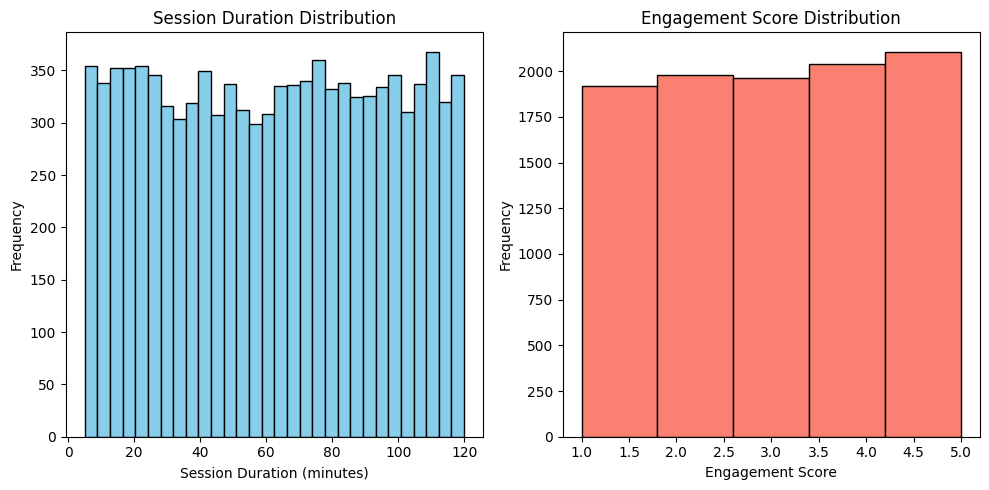

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Histogram for session_duration
plt.subplot(1, 2, 1)
plt.hist(df['session_duration'], bins=30, color='skyblue', edgecolor='black')
plt.title("Session Duration Distribution")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Frequency")

# Histogram for engagement_score
plt.subplot(1, 2, 2)
plt.hist(df['engagement_score'], bins=5, color='salmon', edgecolor='black')
plt.title("Engagement Score Distribution")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [95]:
df['high_accessibility_user'] = (df['accessibility_settings'] >= 3).astype(int)

In [96]:
def intersectional_label(row):
    age = row['age_group']
    gender = row['gender'] if pd.notnull(row['gender']) else "Unknown Gender"
    attributes = row['additional_attributes'] if pd.notnull(row['additional_attributes']) else "No Additional Attributes"
    return f"{age} - {gender} - {attributes}"

df['intersectional_label'] = df.apply(intersectional_label, axis=1)

In [97]:
df

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,intersectional_label
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,1,Teenager - Unknown - LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,No Attributes,1,Professional - Non-Binary - No Attributes
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,No Attributes,0,Adult - Female - No Attributes
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,0,Adult - Unknown - LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,No Attributes,0,Young Adult - Male - No Attributes
...,...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,No Attributes,1,Adult - Non-Binary - No Attributes
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,No Attributes,0,Professional - Male - No Attributes
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,No Attributes,0,Senior - Non-Binary - No Attributes
9998,user_8014,Multilingual,19.23,3,1,Professional,Unknown,LGBTQ+,0,Professional - Unknown - LGBTQ+


## Exploratory Phase

In [98]:
import plotly.express as px

engagement_by_demographics = df.groupby(['feature_used', 'age_group', 'gender', 'additional_attributes'])['engagement_score'].mean().reset_index()

fig = px.bar(
    engagement_by_demographics,
    x='feature_used',
    y='engagement_score',
    color='age_group',
    facet_col='gender',
    hover_data=['additional_attributes'],
    title='Average Engagement Score by Feature, Age Group, and Gender',
    labels={'engagement_score': 'Average Engagement Score', 'feature_used': 'Feature Used'}
)

fig.update_layout(template="plotly_dark")
fig.show()


In [99]:
feature_usage_by_intersectional = df.groupby(['feature_used', 'intersectional_label']).size().reset_index(name='count')

fig = px.bar(
    feature_usage_by_intersectional,
    x='feature_used',
    y='count',
    color='intersectional_label',
    title='Feature Usage by Intersectional Demographic Group',
    labels={'count': 'Number of Users', 'feature_used': 'Feature Used'},
)

fig.update_layout(template="plotly_dark", legend_title_text='Demographic Group')
fig.show()


## Feature Engineering

In [100]:
df['avg_session_duration_per_feature'] = df.groupby('feature_used')['session_duration'].transform('mean')
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,intersectional_label,avg_session_duration_per_feature
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,1,Teenager - Unknown - LGBTQ+,62.902599
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,No Attributes,1,Professional - Non-Binary - No Attributes,62.377668
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,No Attributes,0,Adult - Female - No Attributes,62.819015
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,0,Adult - Unknown - LGBTQ+,62.819015
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,No Attributes,0,Young Adult - Male - No Attributes,62.150608


In [101]:
average_engagement = df.groupby(['accessibility_settings', 'age_group', 'gender'])['engagement_score'].mean().reset_index()
average_engagement.rename(columns={'engagement_score': 'avg_engagement_score'}, inplace=True)
print(average_engagement)

     accessibility_settings     age_group      gender  avg_engagement_score
0                         0         Adult      Female              3.151515
1                         0         Adult        Male              2.746032
2                         0         Adult  Non-Binary              3.036145
3                         0         Adult     Unknown              2.859155
4                         0  Professional      Female              2.805556
..                      ...           ...         ...                   ...
115                       5      Teenager     Unknown              2.968254
116                       5   Young Adult      Female              2.860759
117                       5   Young Adult        Male              3.032258
118                       5   Young Adult  Non-Binary              3.303030
119                       5   Young Adult     Unknown              3.022901

[120 rows x 4 columns]


In [102]:
df = df.merge(average_engagement, on=['accessibility_settings', 'age_group', 'gender'], how='left')
df

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,intersectional_label,avg_session_duration_per_feature,avg_engagement_score
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,1,Teenager - Unknown - LGBTQ+,62.902599,3.015038
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,No Attributes,1,Professional - Non-Binary - No Attributes,62.377668,3.133333
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,No Attributes,0,Adult - Female - No Attributes,62.819015,3.134328
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,0,Adult - Unknown - LGBTQ+,62.819015,3.045455
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,No Attributes,0,Young Adult - Male - No Attributes,62.150608,3.129630
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,No Attributes,1,Adult - Non-Binary - No Attributes,61.953311,2.985507
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,No Attributes,0,Professional - Male - No Attributes,61.953311,3.416667
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,No Attributes,0,Senior - Non-Binary - No Attributes,62.902599,3.015625
9998,user_8014,Multilingual,19.23,3,1,Professional,Unknown,LGBTQ+,0,Professional - Unknown - LGBTQ+,62.902599,3.119403


## Model Decision Tree

##### Normalizing data

In [103]:
numerical_cols = ['session_duration', 'engagement_score', 'avg_session_duration_per_feature', 'avg_engagement_score']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

categorical_cols = ['feature_used', 'age_group', 'gender', 'additional_attributes', 'intersectional_label']
df = pd.get_dummies(df, columns=categorical_cols)

df.head()

,user_id,session_duration,engagement_score,accessibility_settings,high_accessibility_user,avg_session_duration_per_feature,avg_engagement_score,feature_used_Colorblind Mode,feature_used_High Contrast Mode,feature_used_Multilingual,...,intersectional_label_Teenager - Female - No Attributes,intersectional_label_Teenager - Male - No Attributes,intersectional_label_Teenager - Non-Binary - No Attributes,intersectional_label_Teenager - Unknown - LGBTQ+,intersectional_label_Teenager - Unknown - Person of Color,intersectional_label_Young Adult - Female - No Attributes,intersectional_label_Young Adult - Male - No Attributes,intersectional_label_Young Adult - Non-Binary - No Attributes,intersectional_label_Young Adult - Unknown - LGBTQ+,intersectional_label_Young Adult - Unknown - Person of Color
0,user_4737,-0.049933,0.674609,4,1,1.244801,-0.181801,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,user_1492,-1.260219,1.379973,4,1,-0.179426,0.571155,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,user_5936,0.934823,-0.736117,2,0,1.018024,0.577489,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,user_5519,-1.076454,-0.030754,1,0,1.018024,0.011804,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,user_1853,0.871877,1.379973,1,0,-0.795477,0.547581,False,True,False,...,False,False,False,False,False,False,True,False,False,False


##### Data Splitting

In [104]:
from sklearn.model_selection import train_test_split

# Define the target variable y and the feature set X
y = df['high_accessibility_user']
X = df.drop(columns=['high_accessibility_user', 'user_id'])

# Perform a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7000, 47)
X_test shape: (3000, 47)
y_train shape: (7000,)
y_test shape: (3000,)


In [105]:
from sklearn.model_selection import train_test_split

# Define the target variable y and the feature set X
y = df['high_accessibility_user']
X = df.drop(columns=['high_accessibility_user', 'user_id'])

# Perform a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7000, 47)
X_test shape: (3000, 47)
y_train shape: (7000,)
y_test shape: (3000,)


## Model Building - Decision Tree